In [135]:
import numpy as np
import matplotlib.pyplot as plt

In [136]:
boardSize = (15,15)   # Legt die Größe des Feldes fest
timeSteps = 9 # Legt die Spieldauer fest (Anz. Iterationen)

In [137]:
class player:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def move(self,dir):         # Wir können später gerne noch diagonale Bewegungen hinzufügen
        if dir == "up": self.y -=1
        if dir == "down": self.y +=1
        if dir == "right": self.x +=1
        if dir == "left": self.x -=1
            
class aim:
    def __init__(self,x,y):
        self.x = x
        self.y = y        

In [138]:
def createMap(p,a):
    m = np.ones(boardSize)
    m[p.x,p.y] = 0
    m[a.x,a.y] = 0.5
    return m
    
def showMap(m):
    plt.imshow(m, cmap='hot', interpolation='nearest')
    plt.show()
    
def showGameHist(hist,reward):
    for t in range(timeSteps):
        showMap(hist[t])
        print(reward[t])
        
def getReward(p,a):  # Reward für alle Felder
    if(p.x == a.x and p.y == a.y):
        return 100
    return -np.sqrt(np.square(p.x-a.x)+np.square(p.y-a.y))

In [139]:
actions = {
    0 : "up",
    1 : "down",
    2 : "right",
    3 : "left"
}
    

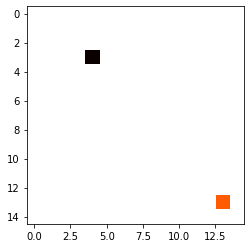

0.0


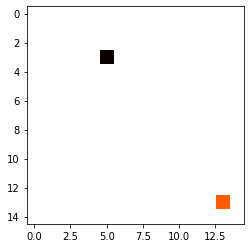

-12.806248474865697


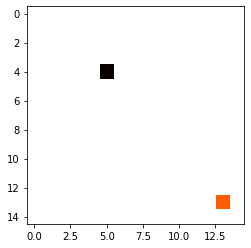

-12.041594578792296


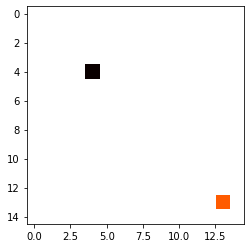

-12.727922061357855


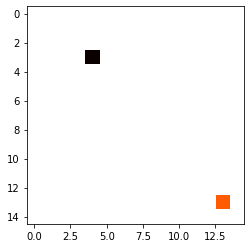

-13.45362404707371


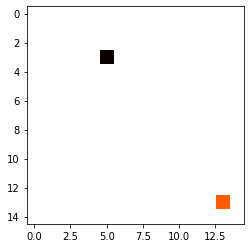

-12.806248474865697


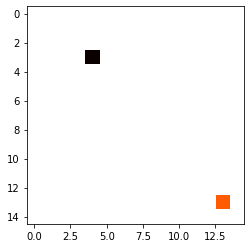

-13.45362404707371


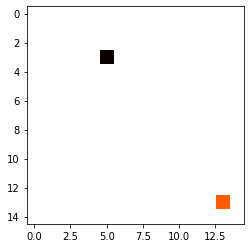

-12.806248474865697


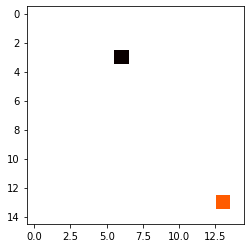

-12.206555615733702


In [141]:
# Init für Board und Reward
gameStates = np.zeros((timeSteps, boardSize[0],boardSize[1] ))  # Speichert Spielverlauf für jeden Timestep
reward = np.zeros(timeSteps)

# Initiale Start und End position
p = player(3,4)  # player is black
a = aim(13,13)   # Aim is Orange
gameStates[0] = createMap(p,a) # Initiales Feld 

for i in range(1, timeSteps):   # Game Loop
    p.move(actions[np.random.randint(4)]) # Bewegungen sind erstmal Random
    reward[i] = getReward(p,a)
    gameStates[i] = createMap(p,a)
    
showGameHist(gameStates, reward) # Zeigt spielverlauf und den aktuellen Reward an